# Задача классификаци: по имеющимся данным определить страну биллионера

### Датасет: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import datetime
import numpy as np

In [69]:
data = pd.read_csv('Billionaires Statistics Dataset.csv')
data

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [70]:
data.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

# Предобработка

- Наличие выбросов и пустых полей (пустые поля: осталось 3 колонки - текстовые и категориальные)

- Удаление колонок

- Зависимость между колонками

- Поиск дубликатов

- Изменение типов колонок (при необходимости)

- Нормализация

- Преобразование категориальных и текстовых признаков


## ----------------------------------------------
## Наличие пустых полей
## ----------------------------------------------

In [71]:
pd.isnull(data).sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

### Удаление колонок с большим количеством пропусков

In [72]:
data = data.drop(columns = ['organization', 'title', 'state', 'residenceStateRegion'])

In [73]:
pd.isnull(data).sum()

rank                                            0
finalWorth                                      0
category                                        0
personName                                      0
age                                            65
country                                        38
city                                           72
source                                          0
industries                                      0
countryOfCitizenship                            0
selfMade                                        0
status                                          0
gender                                          0
birthDate                                      76
lastName                                        0
firstName                                       3
date                                            0
birthYear                                      76
birthMonth                                     76
birthDay                                       76


In [74]:
data[['birthDate', 'birthYear', 'birthMonth', 'birthDay']]

,birthDate,birthYear,birthMonth,birthDay
0,3/5/1949 0:00,1949.0,3.0,5.0
1,6/28/1971 0:00,1971.0,6.0,28.0
2,1/12/1964 0:00,1964.0,1.0,12.0
3,8/17/1944 0:00,1944.0,8.0,17.0
4,8/30/1930 0:00,1930.0,8.0,30.0
...,...,...,...,...
2635,12/14/1971 0:00,1971.0,12.0,14.0
2636,3/10/1943 0:00,1943.0,3.0,10.0
2637,12/18/1962 0:00,1962.0,12.0,18.0
2638,8/21/1951 0:00,1951.0,8.0,21.0


### birthDate не нужен, т.к. данные уже есть в 3 других колонках

### изменить тип c float на int  

In [75]:
data = data.drop(columns = 'birthDate')
data[['birthYear', 'birthMonth', 'birthDay']].astype("Int32")

,birthYear,birthMonth,birthDay
0,1949,3,5
1,1971,6,28
2,1964,1,12
3,1944,8,17
4,1930,8,30
...,...,...,...
2635,1971,12,14
2636,1943,3,10
2637,1962,12,18
2638,1951,8,21


### Заполнили пропуски медианой у числовых значений

In [76]:
data = data.fillna(data.median())

/tmp/ipykernel_3665/1553445849.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


In [77]:
data.isnull().sum()

rank                                            0
finalWorth                                      0
category                                        0
personName                                      0
age                                             0
country                                        38
city                                           72
source                                          0
industries                                      0
countryOfCitizenship                            0
selfMade                                        0
status                                          0
gender                                          0
lastName                                        0
firstName                                       3
date                                            0
birthYear                                       0
birthMonth                                      0
birthDay                                        0
cpi_country                                     0


### Преобразование колонки с $ в число

In [78]:
def convertBillionFromStrToInt(strBillion):
    numbers = re.findall(r'\b\d+\b', str(strBillion))
    billion = ''.join(numbers)
    return 0 if (billion == '') else int(billion)

In [79]:
data['gdp_country'] = data['gdp_country'].apply(lambda x : convertBillionFromStrToInt(x))
data['gdp_country']

0        2715518274227
1       21427700000000
2       21427700000000
3       21427700000000
4       21427700000000
             ...      
2635    19910000000000
2636    21427700000000
2637    19910000000000
2638    19910000000000
2639      376795508680
Name: gdp_country, Length: 2640, dtype: int64

In [80]:
data = data.fillna(data.median())
data.isnull().sum()

/tmp/ipykernel_3665/541291939.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


rank                                           0
finalWorth                                     0
category                                       0
personName                                     0
age                                            0
country                                       38
city                                          72
source                                         0
industries                                     0
countryOfCitizenship                           0
selfMade                                       0
status                                         0
gender                                         0
lastName                                       0
firstName                                      3
date                                           0
birthYear                                      0
birthMonth                                     0
birthDay                                       0
cpi_country                                    0
cpi_change_country  

## ----------------------------------------------
## Проверка на выбросы
## ----------------------------------------------

### rank

<Axes: >

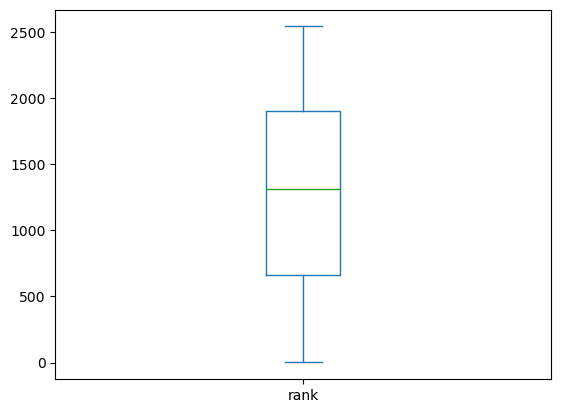

In [81]:
data['rank'].plot(kind = 'box')

### finalWorth

<Axes: >

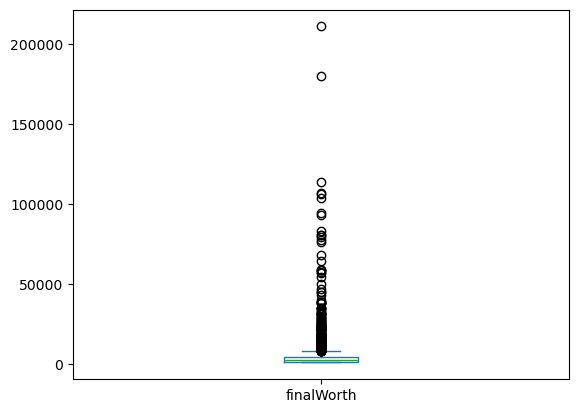

In [82]:
data['finalWorth'].plot(kind = 'box') # удалить 2 выброса - самых верхних

### age

<Axes: >

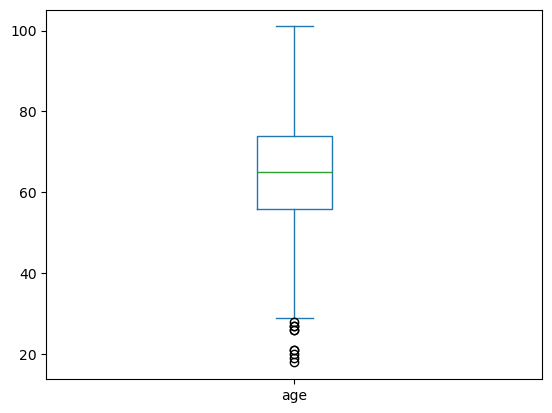

In [83]:
data['age'].plot(kind = 'box')

<Axes: >

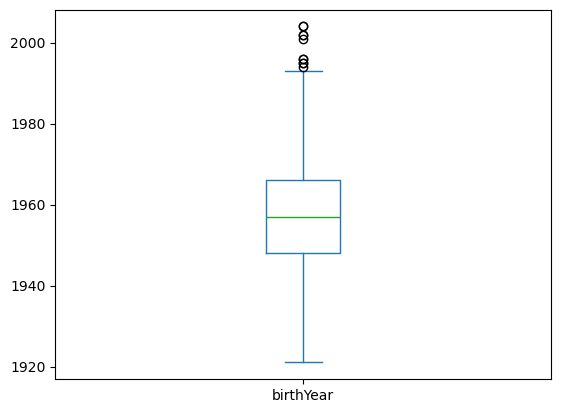

In [84]:
data['birthYear'].plot(kind = 'box')

<Axes: >

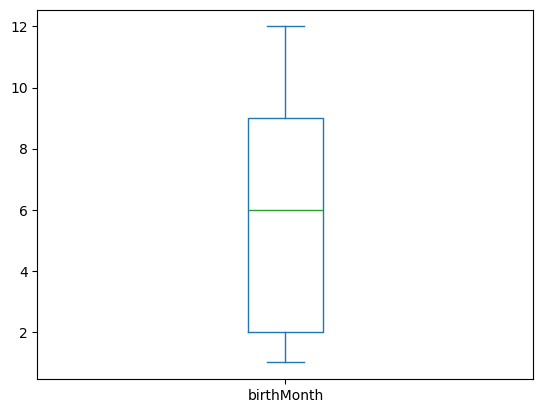

In [85]:
data['birthMonth'].plot(kind = 'box')

<Axes: >

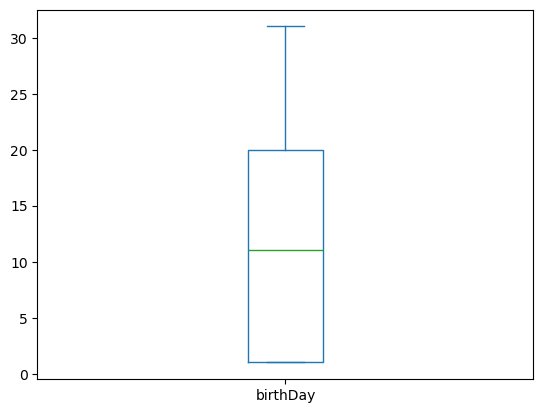

In [86]:
data['birthDay'].plot(kind = 'box')

<Axes: >

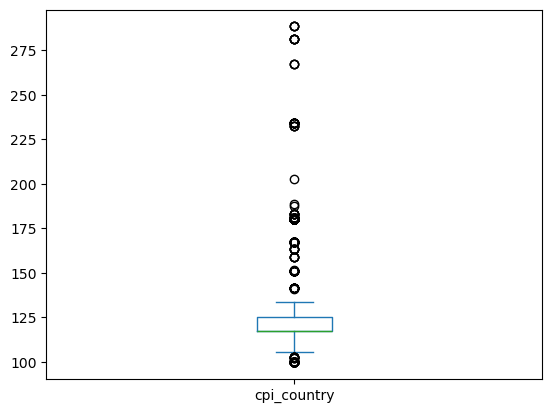

In [87]:
data['cpi_country'].plot(kind = 'box')  # удалить выбросы

<Axes: >

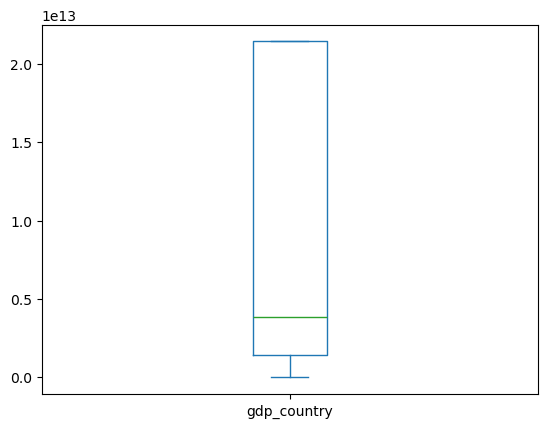

In [88]:
data['gdp_country'].plot(kind = 'box')

<Axes: >

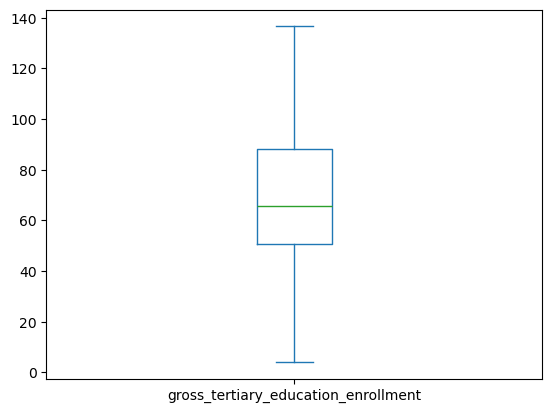

In [89]:
data['gross_tertiary_education_enrollment'].plot(kind = 'box')

<Axes: >

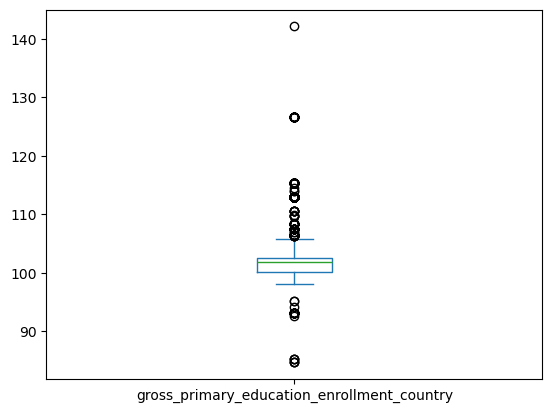

In [90]:
data['gross_primary_education_enrollment_country'].plot(kind = 'box')

<Axes: >

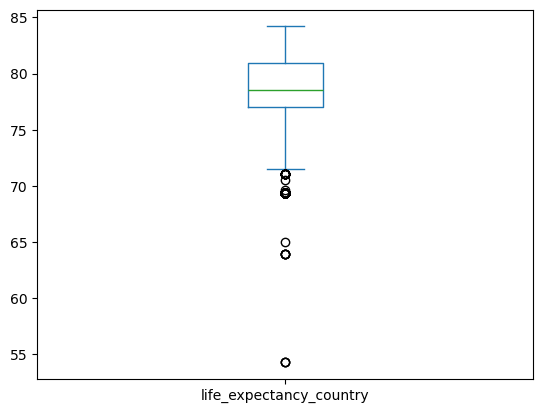

In [91]:
data['life_expectancy_country'].plot(kind = 'box')

<Axes: >

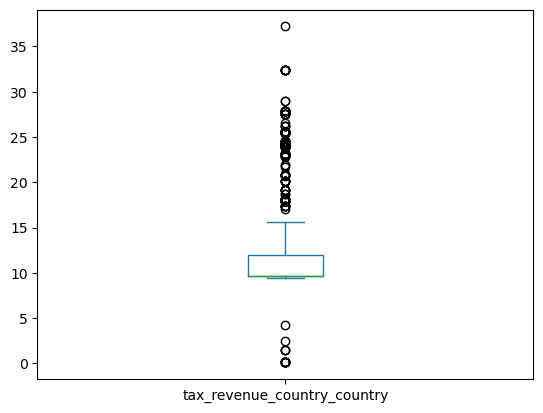

In [92]:
data['tax_revenue_country_country'].plot(kind = 'box')

<Axes: >

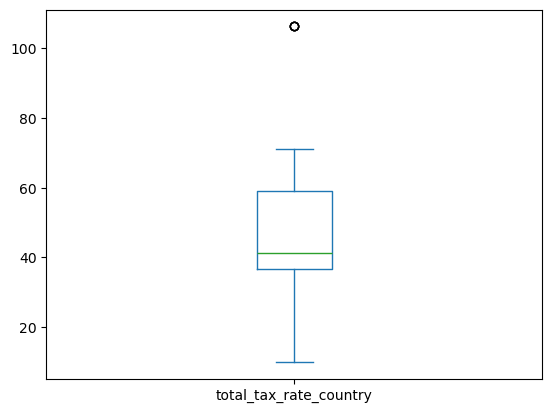

In [93]:
data['total_tax_rate_country'].plot(kind = 'box')

<Axes: >

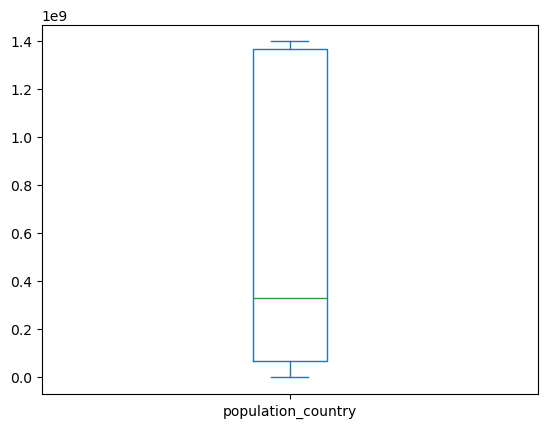

In [94]:
data['population_country'].plot(kind = 'box')

<Axes: >

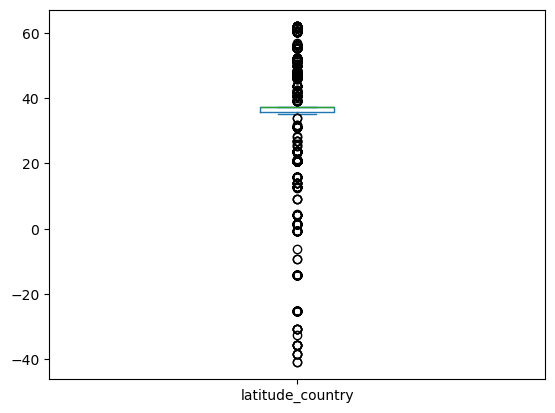

In [95]:
data['latitude_country'].plot(kind = 'box')

<Axes: >

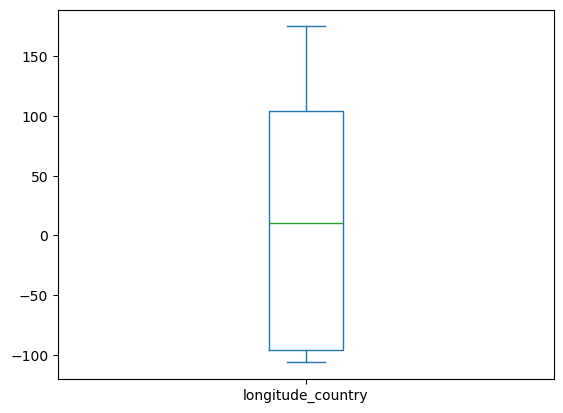

In [96]:
data['longitude_country'].plot(kind = 'box')

## -----------------------------------------
## Удаление колонок
## -----------------------------------------

In [97]:
# Т.к. category и industries одинаковые
data = data.drop(columns = 'industries')
data

,rank,finalWorth,category,personName,age,country,city,source,countryOfCitizenship,selfMade,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,France,False,...,1.1,2715518274227,65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",United States,True,...,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,United States,True,...,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,United States,True,...,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,United States,True,...,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,China,True,...,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,United States,False,...,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,China,True,...,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,China,True,...,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


### Удалить строки со значением 'city' и 'country', равное nan

In [98]:
data = data.dropna(subset = 'city')

In [99]:
data.isna().sum()
# заполнить nan у города медианой при кодировании категориальных значений

rank                                          0
finalWorth                                    0
category                                      0
personName                                    0
age                                           0
country                                       0
city                                          0
source                                        0
countryOfCitizenship                          0
selfMade                                      0
status                                        0
gender                                        0
lastName                                      0
firstName                                     3
date                                          0
birthYear                                     0
birthMonth                                    0
birthDay                                      0
cpi_country                                   0
cpi_change_country                            0
gdp_country                             

### Удаление выбросов

In [100]:
def clearOutliers(column):
    global data
    first_quartile = data[column].describe()['25%']
    third_quartile = data[column].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile

    # Remove outliers
    data = data[(data[column] > (first_quartile - 3 * iqr)) &
            (data[column] < (third_quartile + 3 * iqr))]

In [101]:
outlierColumns = ['finalWorth', 'age', 'birthYear', 'cpi_country', 'gross_primary_education_enrollment_country',
                    'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'latitude_country']

for column in outlierColumns:
    clearOutliers(column=column)

<Axes: >

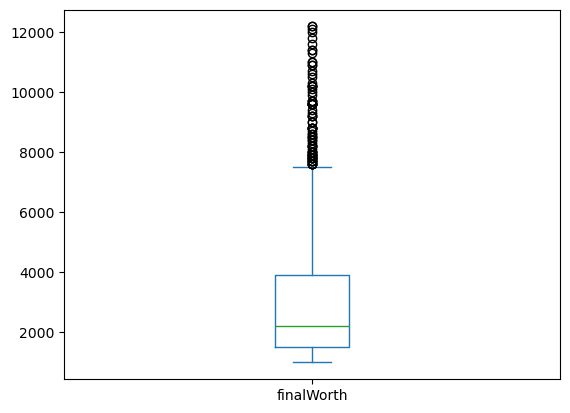

In [102]:
data['finalWorth'].plot(kind = 'box')

<Axes: >

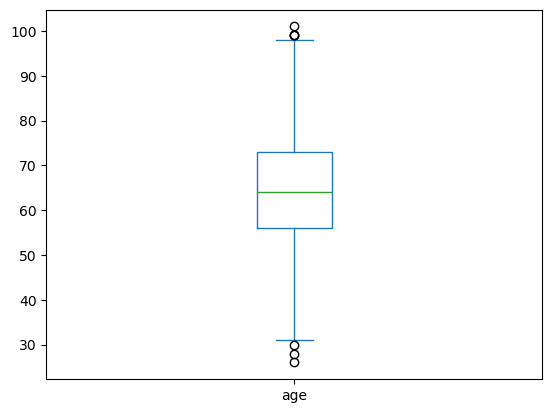

In [103]:
data['age'].plot(kind = 'box')

<Axes: >

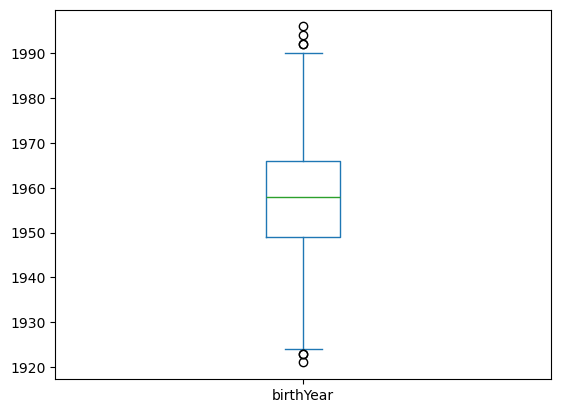

In [104]:
data['birthYear'].plot(kind = 'box')

<Axes: >

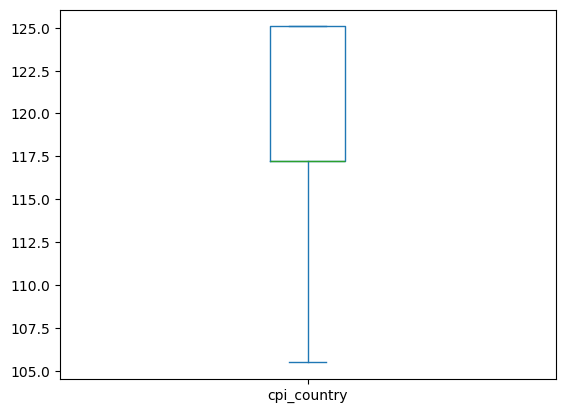

In [105]:
data['cpi_country'].plot(kind = 'box')

<Axes: >

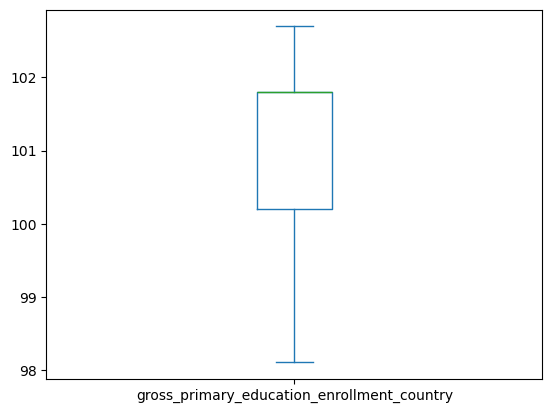

In [106]:
data['gross_primary_education_enrollment_country'].plot(kind = 'box')

<Axes: >

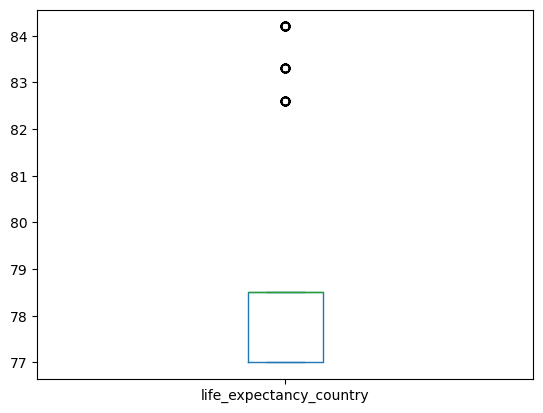

In [107]:
data['life_expectancy_country'].plot(kind = 'box')

<Axes: >

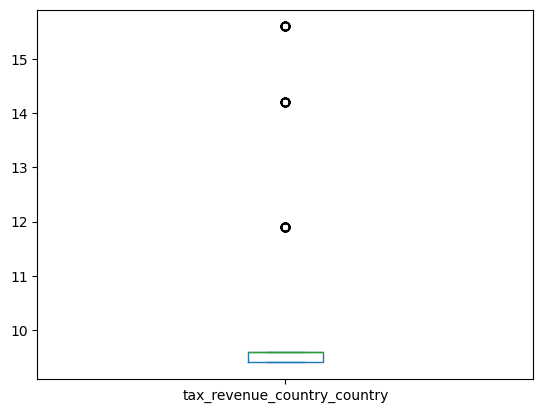

In [108]:
data['tax_revenue_country_country'].plot(kind = 'box')

<Axes: >

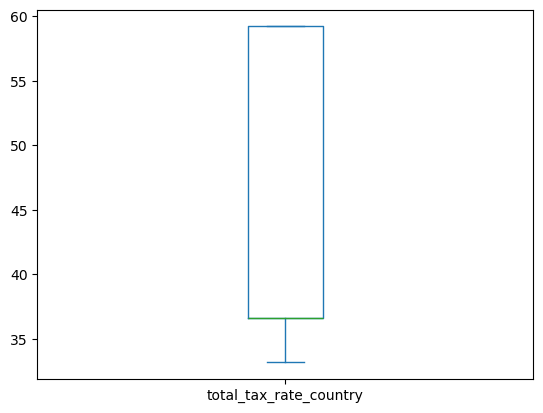

In [109]:
data['total_tax_rate_country'].plot(kind = 'box')

<Axes: >

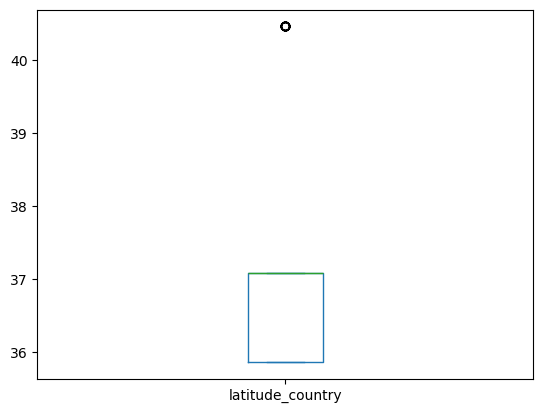

In [110]:
data['latitude_country'].plot(kind = 'box')

## Удаление и изменение типов колонок

### Date

In [111]:
def timeToTimestamp(s):
    return time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y %H:%M").timetuple())

In [112]:
data['date'] = data['date'].apply(lambda s : timeToTimestamp(s))
data['date']

141     1.680574e+09
142     1.680574e+09
143     1.680574e+09
144     1.680574e+09
145     1.680574e+09
            ...     
2634    1.680574e+09
2635    1.680574e+09
2636    1.680574e+09
2637    1.680574e+09
2638    1.680574e+09
Name: date, Length: 1405, dtype: float64

<Axes: ylabel='Frequency'>

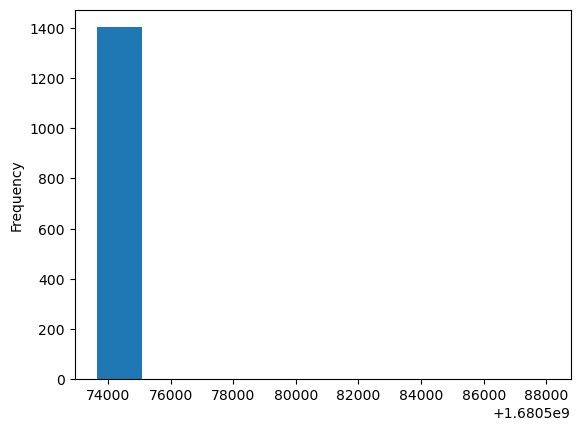

In [113]:
data['date'].plot(kind = 'hist')

In [114]:
data = data.drop(columns= 'date')

### selfMade в Int

In [115]:
data['selfMade'] = data['selfMade'].astype('Int8')
data['selfMade']

141     1
142     1
143     1
144     0
145     1
       ..
2634    1
2635    1
2636    0
2637    1
2638    1
Name: selfMade, Length: 1405, dtype: Int8

### ----------------------------
### Дубликаты
### ----------------------------

In [116]:
data.duplicated().sum()

0

### ---------------------------------------
### Зависимость между числовыми признаками
### ---------------------------------------

In [117]:
num_columns = ['finalWorth', 'age', 'birthYear', 'birthDay', 'birthMonth', 'cpi_country', 'cpi_change_country', 'gdp_country', 
                    'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 
                    'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'population_country',
                    'latitude_country', 'longitude_country']

<Axes: >

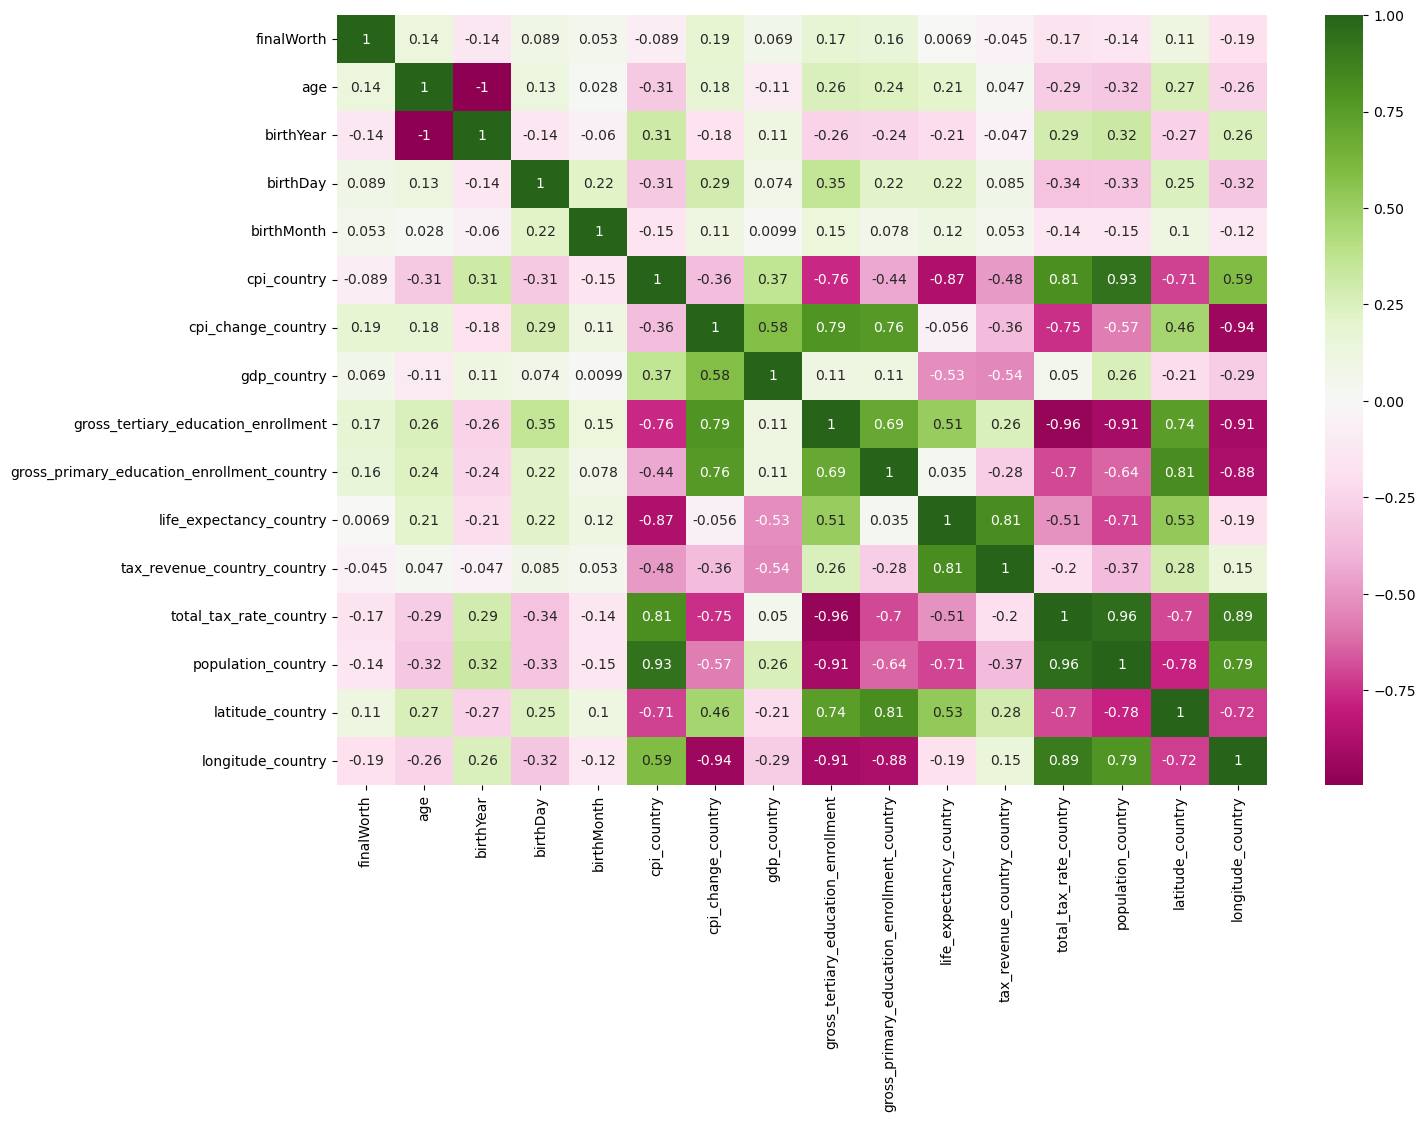

In [118]:
corr_matrix = data[num_columns].corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, cmap="PiYG", annot=True, center=0, ax=ax)


### ------------------------------------------------------------------------------------------------------

cpi_country: Индекс потребительских цен (ИПЦ) для страны миллиардера.

cpi_change_country: Изменение ИПЦ для страны миллиардера.

gdp_country: Валовой внутренний продукт (ВВП) для страны миллиардера.

gross_tertiary_education_enrollment: Количество учащихся в высших учебных заведениях в стране миллиардера.

gross_primary_education_enrollment_country: Число учащихся начальной школы в стране миллиардера.

life_expectancy_country: Ожидаемая продолжительность жизни в стране миллиардера.

tax_revenue_country_country: Налоговые поступления в стране миллиардера.

total_tax_rate_country: Общая налоговая ставка в стране миллиардера.

population_country: Население страны миллиардера.

широта_страны: Координаты широты страны миллиардера.

longitude_country: Координаты долготы страны миллиардера.

### ------------------------------------------------------------------------------------------------------

### Удалить столбцы с сильной корреляцией

In [119]:
# т.к. у нас есть дата рождения, то возраст нам не нужен
data = data.drop(columns='age')

## Подготовка данных и обучение
Нормализация - StandardScaler(), MinMaxScaler()

Кодирование - OneHotEncoder()

Векторизация - TfIdfVectorizer()

simple_classifiers = [KNeighborsClassifier(), svm.SVC(), tree.DecisionTreeClassifier(), 
                  LogisticRegression(), SGDClassifier(), GaussianNB()]

ensemble_classifiers = [ctb.CatBoostClassifier(), xgb.XGBClassifier(),
                  RandomForestClassifier()]

nn_classifiers = [MLPClassifier()]

### После нормализации и кодировании проверить зависимость

### Подобрать метрики

### Визуализировать результаты в виде таблицы

In [2]:
categorial_columns = ['category', 'country', 'city', 'countryOfCitizenship', 'status', 'gender']
num_columns = ['finalWorth', 'selfMade', 'birthYear', 'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country', 'gdp_country', 
                    'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 
                    'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'population_country',
                    'latitude_country', 'longitude_country']
text_columns = ['personName', 'source', 'lastName', 'firstName']

In [121]:
data.to_csv("after_clear_outliers.csv", index=None)

In [3]:
data = pd.read_csv('after_clear_outliers.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        1405 non-null   int64  
 1   finalWorth                                  1405 non-null   int64  
 2   category                                    1405 non-null   object 
 3   personName                                  1405 non-null   object 
 4   country                                     1405 non-null   object 
 5   city                                        1405 non-null   object 
 6   source                                      1405 non-null   object 
 7   countryOfCitizenship                        1405 non-null   object 
 8   selfMade                                    1405 non-null   int64  
 9   status                                      1405 non-null   object 
 10  gender      

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline

import catboost as ctb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier



def getPipeline(_encoder = OneHotEncoder(handle_unknown='ignore'),
                _scaler = MinMaxScaler(),
                _decomposer = PCA(),
                _classificator = KNeighborsClassifier()):
    preprocessor = ColumnTransformer([
        ("encoding", _encoder, categorial_columns),
        ("scaling", _scaler, num_columns)],
        remainder='passthrough')
    
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('decomposer', _decomposer),
        ('classificator', _classificator)
    ])

    return pipe

In [41]:
from sklearn.base import TransformerMixin
class LabelEncoderWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelEncoder(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class TSNEWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, n_components, random_state=None, method='exact'):
        self.n_components = n_components
        self.method = method
        self.random_state = random_state

    def fit(self, X, y = None):
        ts = TSNE(n_components = self.n_components,
        method = self.method, random_state = self.random_state)
        self.X_tsne = ts.fit_transform(X)
        return self

    def transform(self, X, y = None):
        return X

In [45]:
encoders = [OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)]
scalers = [MinMaxScaler(), StandardScaler()]
decomposers = [PCA()]

simple_classifiers = [KNeighborsClassifier(), svm.SVC(), tree.DecisionTreeClassifier(), 
                  LogisticRegression(), SGDClassifier()]

ensemble_classifiers = [ctb.CatBoostClassifier(), RandomForestClassifier()]

nn_classifiers = [MLPClassifier()]

In [46]:
import itertools

all_combos_with_simple_classifiers = [encoders, scalers, decomposers, simple_classifiers]
all_combos_with_ensemble_classifiers = [encoders, scalers, decomposers, ensemble_classifiers]
all_combos_with_nn_classifiers = [encoders, scalers, decomposers, nn_classifiers]

simple_classifeir_combos = [part for part in itertools.product(*all_combos_with_simple_classifiers)]
ensemble_classifier_combos = [part for part in itertools.product(*all_combos_with_ensemble_classifiers)]
nn_classifeir_combos = [part for part in itertools.product(*all_combos_with_nn_classifiers)]

In [47]:
simple_classifeir_combos

[(OneHotEncoder(handle_unknown='ignore'),
  MinMaxScaler(),
  PCA(),
  KNeighborsClassifier()),
 (OneHotEncoder(handle_unknown='ignore'), MinMaxScaler(), PCA(), SVC()),
 (OneHotEncoder(handle_unknown='ignore'),
  MinMaxScaler(),
  PCA(),
  DecisionTreeClassifier()),
 (OneHotEncoder(handle_unknown='ignore'),
  MinMaxScaler(),
  PCA(),
  LogisticRegression()),
 (OneHotEncoder(handle_unknown='ignore'),
  MinMaxScaler(),
  PCA(),
  SGDClassifier()),
 (OneHotEncoder(handle_unknown='ignore'),
  StandardScaler(),
  PCA(),
  KNeighborsClassifier()),
 (OneHotEncoder(handle_unknown='ignore'), StandardScaler(), PCA(), SVC()),
 (OneHotEncoder(handle_unknown='ignore'),
  StandardScaler(),
  PCA(),
  DecisionTreeClassifier()),
 (OneHotEncoder(handle_unknown='ignore'),
  StandardScaler(),
  PCA(),
  LogisticRegression()),
 (OneHotEncoder(handle_unknown='ignore'),
  StandardScaler(),
  PCA(),
  SGDClassifier()),
 (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
  MinMaxScaler(),


In [11]:
tf = TfidfVectorizer()

def vectorize(column):
    global data
    vec_data = tf.fit_transform(data[column].apply(lambda x: np.str_(x))).toarray()
    vec_data_cols = [column + '_' + str(i) for i in range(vec_data.shape[1])]
    vec_data_df = pd.DataFrame(vec_data, columns=vec_data_cols)
    data = pd.concat([data, vec_data_df], axis=1)

In [12]:
for column in text_columns:
    vectorize(column)

In [13]:
data = data.drop(columns=['personName', 'source', 'lastName', 'firstName'], axis=1)
data.shape

(1405, 4098)

In [21]:
X = data
Y = data['country']

In [22]:
data.columns

Index(['rank', 'finalWorth', 'category', 'country', 'city',
       'countryOfCitizenship', 'selfMade', 'status', 'gender', 'birthYear',
       ...
       'firstName_959', 'firstName_960', 'firstName_961', 'firstName_962',
       'firstName_963', 'firstName_964', 'firstName_965', 'firstName_966',
       'firstName_967', 'firstName_968'],
      dtype='object', length=4098)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

results = []
for [encoder, scaler, decomposer, classifier] in simple_classifeir_combos:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    pipe = getPipeline(encoder, scaler, decomposer, classifier)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    results.append(
        {
            'encoder'       :   encoder, 
            'scaler'        :   scaler,
            'decomposer'    :   decomposer,
            'classifier'    :   classifier,
            'f1_macro'      :   f1_macro,
            'f1_micro'      :   f1_micro,
            'f1_weighted'   :   f1_weighted,
            'y_pred'        :   y_pred
        }
    )



/home/leon/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/leon/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [ ]:
results

In [25]:
metrics = pd.DataFrame(results)

In [26]:
metrics

,encoder,scaler,decomposer,classifier,f1_macro,f1_micro,f1_weighted,y_pred
0,OneHotEncoder(handle_unknown='ignore'),MinMaxScaler(),PCA(),KNeighborsClassifier(),0.204582,0.829181,0.795090,"[China, China, China, United States, China, Un..."
1,OneHotEncoder(handle_unknown='ignore'),MinMaxScaler(),PCA(),SVC(),0.110190,0.551601,0.498395,"[China, United States, United States, United S..."
2,OneHotEncoder(handle_unknown='ignore'),MinMaxScaler(),PCA(),DecisionTreeClassifier(),0.865847,0.992883,0.991695,"[China, China, China, United States, China, Ch..."
3,OneHotEncoder(handle_unknown='ignore'),MinMaxScaler(),PCA(),LogisticRegression(),0.686957,0.989324,0.984682,"[China, China, China, United States, China, Ch..."
4,OneHotEncoder(handle_unknown='ignore'),MinMaxScaler(),PCA(),SGDClassifier(),0.066076,0.313167,0.296105,"[United States, China, China, China, United St..."
5,OneHotEncoder(handle_unknown='ignore'),StandardScaler(),PCA(),KNeighborsClassifier(),0.193414,0.832740,0.809111,"[China, China, China, United States, China, Un..."
6,OneHotEncoder(handle_unknown='ignore'),StandardScaler(),PCA(),SVC(),0.110190,0.551601,0.498395,"[China, United States, United States, United S..."
7,OneHotEncoder(handle_unknown='ignore'),StandardScaler(),PCA(),DecisionTreeClassifier(),0.641667,0.982206,0.977970,"[China, China, China, United States, China, Ch..."
8,OneHotEncoder(handle_unknown='ignore'),StandardScaler(),PCA(),LogisticRegression(),0.681818,0.989324,0.984471,"[China, China, China, United States, China, Ch..."
9,OneHotEncoder(handle_unknown='ignore'),StandardScaler(),PCA(),SGDClassifier(),0.120595,0.384342,0.433974,"[Cayman Islands, United States, China, United ..."


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

results = []
for [encoder, scaler, decomposer, classifier] in nn_classifeir_combos:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    pipe = getPipeline(encoder, scaler, decomposer, classifier)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    results.append(
        {
            'encoder'       :   encoder, 
            'scaler'        :   scaler,
            'decomposer'    :   decomposer,
            'classifier'    :   classifier,
            'f1_macro'      :   f1_macro,
            'f1_micro'      :   f1_micro,
            'f1_weighted'   :   f1_weighted,
            'y_pred'        :   y_pred
        }
    )

/home/leon/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
metrics = pd.DataFrame(results)

In [35]:
metrics

,encoder,scaler,decomposer,classifier,f1_macro,f1_micro,f1_weighted,y_pred
0,OneHotEncoder(handle_unknown='ignore'),MinMaxScaler(),PCA(),MLPClassifier(),0.601153,0.975089,0.970848,"[China, China, China, United States, China, Ch..."
1,OneHotEncoder(handle_unknown='ignore'),StandardScaler(),PCA(),MLPClassifier(),0.754646,0.989324,0.986193,"[China, China, China, United States, China, Ch..."
2,OrdinalEncoder(handle_unknown='use_encoded_val...,MinMaxScaler(),PCA(),MLPClassifier(),0.552343,0.953737,0.943761,"[China, China, China, United States, China, Ch..."
3,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),PCA(),MLPClassifier(),0.675487,0.985765,0.980932,"[China, China, China, United States, China, Ch..."


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

results = []
for [encoder, scaler, decomposer, classifier] in ensemble_classifier_combos:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    pipe = getPipeline(encoder, scaler, decomposer, classifier)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    results.append(
        {
            'encoder'       :   encoder, 
            'scaler'        :   scaler,
            'decomposer'    :   decomposer,
            'classifier'    :   classifier,
            'f1_macro'      :   f1_macro,
            'f1_micro'      :   f1_micro,
            'f1_weighted'   :   f1_weighted,
            'y_pred'        :   y_pred
        }
    )

Learning rate set to 0.0796
0:	learn: 2.2251840	total: 456ms	remaining: 7m 35s
1:	learn: 1.9112763	total: 899ms	remaining: 7m 28s
2:	learn: 1.6590891	total: 1.33s	remaining: 7m 22s
3:	learn: 1.4853664	total: 1.78s	remaining: 7m 22s
4:	learn: 1.3461762	total: 2.24s	remaining: 7m 25s
5:	learn: 1.2342738	total: 2.69s	remaining: 7m 25s
6:	learn: 1.1337949	total: 3.14s	remaining: 7m 25s
7:	learn: 1.0473964	total: 3.59s	remaining: 7m 25s
8:	learn: 0.9722708	total: 4.04s	remaining: 7m 24s
9:	learn: 0.9016377	total: 4.47s	remaining: 7m 23s
10:	learn: 0.8488019	total: 4.93s	remaining: 7m 22s
11:	learn: 0.7971281	total: 5.37s	remaining: 7m 22s
12:	learn: 0.7496188	total: 5.83s	remaining: 7m 22s
13:	learn: 0.6948182	total: 6.29s	remaining: 7m 22s
14:	learn: 0.6558422	total: 6.74s	remaining: 7m 22s
15:	learn: 0.6070712	total: 7.19s	remaining: 7m 21s
16:	learn: 0.5748274	total: 7.64s	remaining: 7m 22s
17:	learn: 0.5457075	total: 8.11s	remaining: 7m 22s
18:	learn: 0.5113830	total: 8.56s	remaining: 7

In [49]:
metrics = pd.DataFrame(results)

In [50]:
metrics

,encoder,scaler,decomposer,classifier,f1_macro,f1_micro,f1_weighted,y_pred
0,OneHotEncoder(handle_unknown='ignore'),MinMaxScaler(),PCA(),<catboost.core.CatBoostClassifier object at 0x...,0.794781,0.992883,0.989417,"[[China], [China], [China], [United States], [..."
1,OneHotEncoder(handle_unknown='ignore'),MinMaxScaler(),PCA(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.572522,0.950178,0.936983,"[China, China, China, United States, China, Ch..."
2,OneHotEncoder(handle_unknown='ignore'),StandardScaler(),PCA(),<catboost.core.CatBoostClassifier object at 0x...,0.686957,0.989324,0.984682,"[[China], [China], [China], [United States], [..."
3,OneHotEncoder(handle_unknown='ignore'),StandardScaler(),PCA(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.467713,0.935943,0.916240,"[China, China, China, United States, China, Ch..."
4,OrdinalEncoder(handle_unknown='use_encoded_val...,MinMaxScaler(),PCA(),<catboost.core.CatBoostClassifier object at 0x...,0.628099,0.989324,0.986089,"[[China], [China], [China], [United States], [..."
5,OrdinalEncoder(handle_unknown='use_encoded_val...,MinMaxScaler(),PCA(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.457563,0.928826,0.909364,"[China, China, China, United States, China, Ch..."
6,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),PCA(),<catboost.core.CatBoostClassifier object at 0x...,0.628099,0.989324,0.986089,"[[China], [China], [China], [United States], [..."
7,OrdinalEncoder(handle_unknown='use_encoded_val...,StandardScaler(),PCA(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.427395,0.928826,0.906060,"[China, China, China, United States, China, Ch..."
